# Introduction
In an increasingly digital financial world, the prevention of fraudulent activities becomes a critical priority for institutions and individuals alike. Credit card fraud emerges as a pervasive and costly threat, affecting millions of transactions daily and challenging conventional security mechanisms. As technology advances, so too does the complexity and frequency of fraud attempts, making manual detection not only inefficient but virtually impossible at scale. This project explores the development of a machine learning model to detect credit card fraud by learning patterns in transactional behaviour. Machine learning offers a dynamic and adaptive approach, capable of identifying subtle anomalies and suspicious activities that would otherwise go unnoticed. By leveraging historical transaction data, the model attempts to distinguish between genuine and fraudulent transactions in real-time or near real-time settings.

The chosen dataset, sourced from Kaggle, contains anonymised European credit card transactions, including both normal and fraudulent activities. The dataset exhibits a substantial class imbalance, with fraudulent instances forming a small minority, a scenario that mirrors real-world conditions. To address this challenge, synthetic oversampling techniques such as SMOTE are employed, ensuring the model does not become biased towards majority classes. The project follows a structured workflow, data exploration, preprocessing, resampling, algorithm selection, model training, and evaluation. A blend of classification algorithms, including Logistic Regression, Random Forest, and Linear SVM, is used to compare performance across key metrics such as precision, recall, F1-score, and ROC-AUC. Each model is designed and fine-tuned with a focus on accuracy, interpretability, and training efficiency. By the end of this investigation, the project aims to identify which machine learning technique performs most effectively under constrained conditions and to suggest how these approaches may be expanded in practical fraud detection systems. The work bridges academic understanding with real-world applicability, offering insights into the strengths and trade-offs of automated fraud detection in financial systems.

# 1. Install Required Libraries

In [2]:
!pip install imbalanced-learn

# 2. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE


# 3. Load the Dataset

In [8]:
df = pd.read_csv("C:\\Users\\lakshmi\\Downloads\\archive (41)\\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,2.837260e+05,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,-5.409347e-17,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.000002e+00,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-3.533268e-01,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-3.309625e-01,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,-2.654671e-01,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,-4.378088e-02,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.022476e+02,1.000000


In [14]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

# 4. Preprocessing

In [9]:
# Check nulls and duplicates
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

# Scale 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# 5. Split and Handle Class Imbalance with SMOTE

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Class
0    198277
1       331
Name: count, dtype: int64
After SMOTE: Class
0    198277
1    198277
Name: count, dtype: int64


In [19]:
#target column distribution
target_count=df['Class'].value_counts()
target_count

Class
0    283253
1       473
Name: count, dtype: int64

Text(0, 0.5, 'target_count')

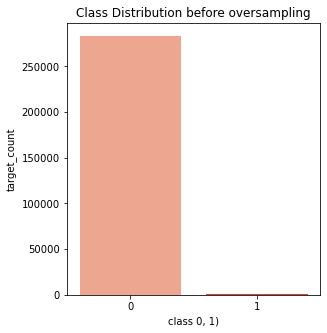

In [20]:
#class distribution before oversampling
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x=target_count.index,y=target_count.values,palette='Reds')
plt.title('Class Distribution before oversampling')
plt.xlabel("class 0, 1)")
plt.ylabel('target_count')

# 6. Train Models and Ploting Confusion Matrix


--- Logistic Regression ---
Training Time: 2.49 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.10      0.85      0.18       142

    accuracy                           0.99     85118
   macro avg       0.55      0.92      0.59     85118
weighted avg       1.00      0.99      0.99     85118



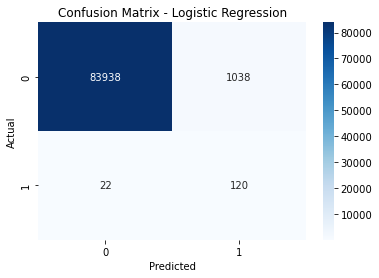


--- Random Forest ---
Training Time: 21.72 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.49      0.82      0.62       142

    accuracy                           1.00     85118
   macro avg       0.75      0.91      0.81     85118
weighted avg       1.00      1.00      1.00     85118



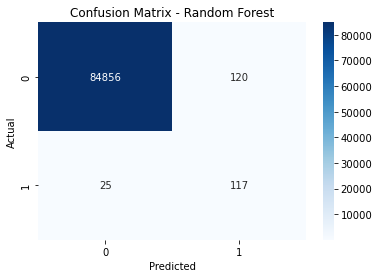


--- Linear SVM ---
Training Time: 123.70 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.15      0.74      0.25       142

    accuracy                           0.99     85118
   macro avg       0.57      0.87      0.62     85118
weighted avg       1.00      0.99      0.99     85118



D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


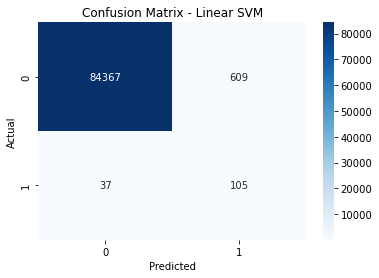

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),
    "Linear SVM": LinearSVC(max_iter=1000)
}

for name, model in models.items():
    start = time.time()
    model.fit(X_res, y_res)
    end = time.time()

    y_pred = model.predict(X_test)

    print(f"\n--- {name} ---")
    print(f"Training Time: {end - start:.2f} seconds")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_conf_matrix(y_test, y_pred, f"Confusion Matrix - {name}")


# 7. ROC Curve for All Models

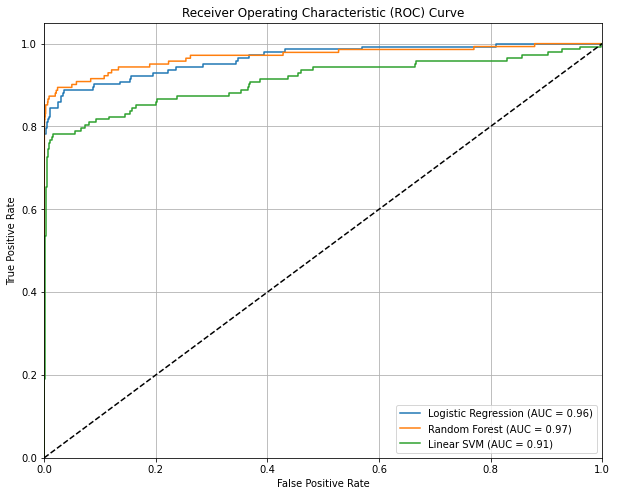

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Initialize plot
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get prediction scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)   # Decision scores (e.g., LinearSVC)
    else:
        continue  # Skip model if neither method is available

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Conclusion
This project demonstrates the immense potential of machine learning in identifying credit card fraud with speed, accuracy, and minimal manual oversight. Through a thoughtful implementation pipeline that includes data preprocessing, SMOTE-based resampling, and algorithmic comparisons, the study presents a replicable and scalable solution to one of the most persistent challenges in financial cybersecurity. Among the models explored, Logistic Regression and Random Forest emerge as effective and interpretable options. While Logistic Regression offers clarity and speed, Random Forest delivers robust performance even under imbalanced class conditions. The use of Linear SVM, although theoretically sound, highlights certain practical limitations in training time and convergence, especially on large-scale datasets prompting a reflection on the trade-offs between algorithm complexity and usability.

The findings reinforce the importance of preprocessing and resampling strategies in fraud detection pipelines. Handling class imbalance using SMOTE significantly improves the model's ability to detect rare fraudulent cases without compromising the integrity of normal transaction classification. Visual tools such as confusion matrices and ROC curves further enhance interpretability, enabling clearer comparisons across different models. Looking forward, future developments may include integrating deep learning models, expanding datasets with temporal features, or deploying real-time fraud detection engines into financial systems. The adaptability and continuous learning capabilities of ML models position them as vital components of evolving digital security infrastructures. In conclusion, this project not only achieves technical objectives but also contributes to a deeper understanding of how intelligent systems can mimic human intuition in a high-stakes, fast-paced domain. The work paves the way for more resilient, transparent, and ethical fraud detection mechanisms that serve both organisations and individuals in a connected world.

